<!--# STAT 207: Data Science Exploration-->
## For Loops, Functions and Monte Carlo Simulation

Flow control methods such as for loops allow us to automate repetitive operations. When running simulations this allows us to repeatedly sample from data either to test out a sampling model or to construct resampling based inferences such as the bootstrap, which will be discussed in later chapters. 

We use Python functions constantly, and a valuable feature of Python and many programming languages is the ability to build our own functions to perform frequent specialized tasks.

In this section we first introduce how for loops work, then develop a small function for Monte Carlo sampling from a data frame. Then we use this to investigate the sample distributions of sample means and proportions for random samples of varying sample sizes, when sampling with replacement.

Using Monte Carlo simulation we demonstrate the square root rule for the standard deviation of the mean and the approximate normal distribution of the sample mean of a large sample. This latter approximation is consistent with the Central Limit Theorem from probability theory.

### Flow control: for loop

In order to do simulations we use Python's flow control to allow us to repeatedly draw samples. The **for** loop is fundamental in many programming languages. Here's a simple version. Notice that for Python the **colon (:)** and **indentation** are important. The indentation needs to be 4 characters wide! The notebook formats this automatically. 

In [1]:
for x in ["Fido", "Rex", "Mitzi", "Fluffy", "Mr. Lizard"]:
    print("Here ", x, "!", sep="")

Here Fido!
Here Rex!
Here Mitzi!
Here Fluffy!
Here Mr. Lizard!


Here's another example, with the same general principle that the for loop passes through all the values in the "in" list.

In [2]:
for i in range(5):
    print("Hello Fidotron-R", i, ", welcome!", sep="")

Hello Fidotron-R0, welcome!
Hello Fidotron-R1, welcome!
Hello Fidotron-R2, welcome!
Hello Fidotron-R3, welcome!
Hello Fidotron-R4, welcome!


The for loop allows us to do an operation repeatedly by stepping through a finite list. This is extremely useful for performing computer simulations in which we repeatedly draw samples and study the the effects of random variation on the statistics.

### Sampling distribution of the mean

The sample mean is common statistic used to summarize the central tendancies of particular variables in the data. When the data are drawn from a larger population at random, the sample mean provides an estimate of the mean for the whole population. In a sample survey the sample that we get from the population is random, and woul be different if we were to repeat the sampling process. However, if the *sample* is large enough then sample statistics will tend to be close to the correpsonding population parameters, and the variation in the sample statistics is predictable.

**Example:** the proportion of voting age citizens who support a given policy in a population can be thought of as the mean of all the 0/1 indicators for whether each citizen supports the policy. 1 means they support it; 0 means they don't. The average of all these 0s and 1s is the proportion supporting the policy. If we draw a random sample from the population, the sample proportion is the sample mean of all the 0's and 1's selected for the sample. How much variation is there in this sample proportion due to the random sampling? We investigate questions like these through simulation. Later we will see that theory provides precise information about the variation in the sample proportion.

Before specifically addressing the special case of the sample proportion, let's consider the case of sample means for variables in data frames in general. We set up a Monte Carlo simulation scheme in which we repeatedly draw random samples and see how the resulting sample means vary. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
# create a data frame for illustration and testing
courses = ['adv307', 'badm210', 'badm210', 'badm210', 
           'cs105', 'cs105', 'stat107', 'stat207']
sections = ['A', 'A', 'B', 'C', 'A', 'B', 'A', 'A']
enrollments = [37, 215, 178, 197, 345, 201, 197, 53]
sectdf = pd.DataFrame({'course': courses, 
                       'section': sections, 
                       'enrolled': enrollments})
sectdf

,course,section,enrolled
0,adv307,A,37
1,badm210,A,215
2,badm210,B,178
3,badm210,C,197
4,cs105,A,345
5,cs105,B,201
6,stat107,A,197
7,stat207,A,53


In [5]:
sectdf['enrolled'].mean()

177.875

Let's generate 5 random samples form the data frame and calculate the corresponding sample means. This is a very simple example of a Monte Carlo simulation.

We use a for loop where we initialize an empty array, SampleMeans, and then iterate a sepcified number of times. To understand how each step works you might find it helpful to break out the individual steps and run them with different values of the iteration variable i. 

In [6]:
# iterate 5 times
x = 'enrolled'
SampleMeans = []
for i in range(5):
    SampleMeans.append(sectdf[x].sample(10, replace=True).mean())
    print(SampleMeans)
print(pd.DataFrame({x: SampleMeans}))

[169.1]
[169.1, 210.1]
[169.1, 210.1, 210.3]
[169.1, 210.1, 210.3, 134.8]
[169.1, 210.1, 210.3, 134.8, 188.5]
   enrolled
0     169.1
1     210.1
2     210.3
3     134.8
4     188.5


In [7]:
# iterate 1000 times
# parametrize the sample size. number of random samples, 
# and the variable name
x = 'enrolled'
n=10
M=1000
SampleMeans = []
for i in range(M):
    SampleMeans.append(sectdf[x].sample(n, replace=True).mean())
MonteCarlo = pd.DataFrame({x: SampleMeans})

In [8]:
MonteCarlo.shape

(1000, 1)

In [9]:
MonteCarlo.head(10)

,enrolled
0,143.0
1,142.4
2,181.7
3,150.3
4,152.7
5,200.8
6,148.9
7,224.3
8,175.9
9,211.8


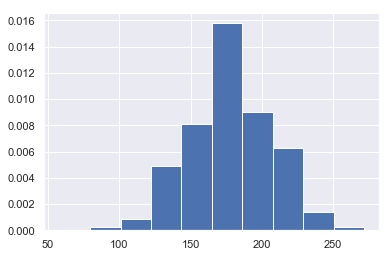

In [10]:
MonteCarlo[x].hist(density=True)
plt.show()

### Making our own functions

If we want to try lots of different values for n and M it gets tedious to keep copying the code and changing the parameters in multiple locations. Instead, we can make our own function to do this kind of task with varying inputs. This saves a lot of redundant effort. It also makes it easier to understand and debug the code. 

Here's a function to do the Monte carlo simulation of the sample mean for different sample sizes and numbers of Monte Carlo samples. Notice that we input the data frame (or data series), variable name x as a text string, sample size n, and number of Monte Carlo samples M. Here again, the **colon (:)** and **indentation (4 characters)** are important to indicate that the ensuing lines of code are included in the function.

In [11]:
def MCmeans(df, x='', replace=True, n=1, M=1):
    # df is a data frame
    # x is a text-valued name for a variable in the data frame
    # replace = True or False depending on whether 
    #    draws are with or without replacement
    # n = number of draws per sample
    # M = number of samples to draw
    MCstats = []
    for i in range(M):
        MCstats.append(df[x].sample(n, replace=replace).mean())
    return pd.DataFrame({x: MCstats})

In [12]:
MCmeans(df=sectdf, x='enrolled')

,enrolled
0,201.0


In [13]:
MCmeans(df=sectdf, x="enrolled", n=1, M=10)

,enrolled
0,53.0
1,345.0
2,345.0
3,345.0
4,201.0
5,201.0
6,197.0
7,197.0
8,197.0
9,178.0


In [14]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=1, M=10000)
MonteCarlo.shape

(10000, 1)

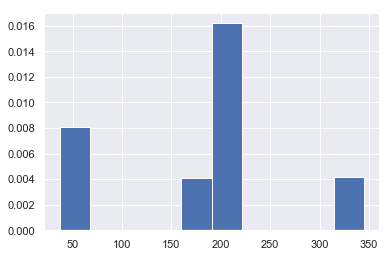

In [15]:
MonteCarlo['enrolled'].hist(density=True)
plt.show()

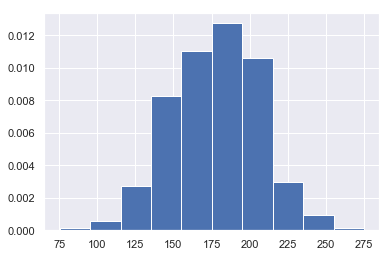

In [16]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=10, M=10000)
MonteCarlo['enrolled'].hist(density=True)
plt.show()

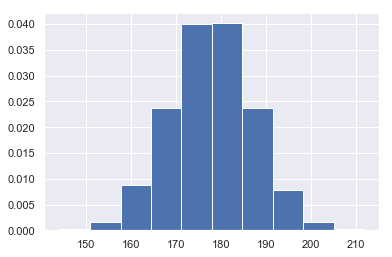

In [17]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=100, M=10000)
MonteCarlo['enrolled'].hist(density=True)
plt.show()

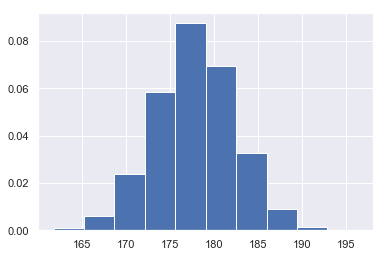

In [18]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=400, M=10000)
MonteCarlo['enrolled'].hist(density=True)
plt.show()

### Sampling distribution of the proportion of "heads" in coin tossing

With our function available we can simulate all kinds of things. Here is a "data frame" of the possible outcomes when flipping a coin.

In [19]:
df = pd.DataFrame({'toss':['heads','tails'], 'value': [1, 0]})
df

,toss,value
0,heads,1
1,tails,0


If we make one draw, i.e., toss the coin once, then the uniform probability principle tells us the probability of a 1 is $p$ = 1/2. What if we draw (flip) 10 times randomly and without replacement? What proportion $\hat{p}$ of "heads" do we expect? How much is it likely to vary from this expectation? What if we toss 100 times, or 400?

Let's consider a series of sample sizes and study how the sampling distribution is affected. We'll compute mean and standard deviation of the Monte Carlo values, and look at the histrogram as well to get a picture fo the sample distributions for different sample sizes.

In [20]:
MonteCarlo = MCmeans(df=df, x="value", n=10, M=10000)
print('Sample size = ', 10)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  10
Mean value for sample proportion = 0.49977
Standard Deviation for sample proportion = 0.15817


What does the sample distribution look like?

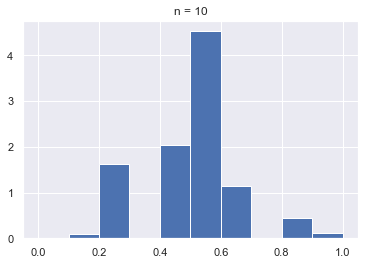

In [21]:
MonteCarlo['value'].hist(density=True)
plt.title('n = 10')
plt.show()

Let's compare the sample distribution of $\hat{p}$ for 100, 400 and 1600 tosses.

In [22]:
MonteCarlo = MCmeans(df=df, x="value", n=100, M=10000)
print('Sample size = ', 100)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  100
Mean value for sample proportion = 0.49951
Standard Deviation for sample proportion = 0.05054


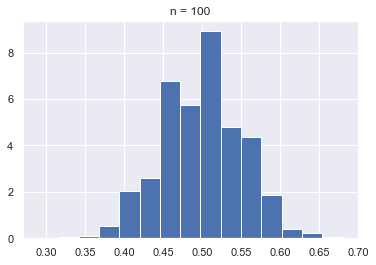

In [23]:
MonteCarlo['value'].hist(density=True, bins=15)
plt.title('n = 100')
plt.show()

In [24]:
MonteCarlo = MCmeans(df=df, x="value", n=400, M=10000)
print('Sample size = ', 400)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  400
Mean value for sample proportion = 0.49997
Standard Deviation for sample proportion = 0.02505


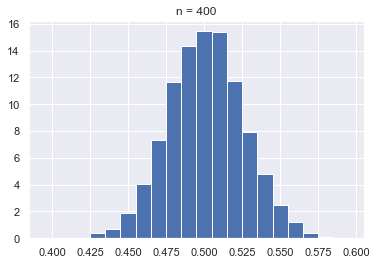

In [25]:
MonteCarlo['value'].hist(density=True, bins=20)
plt.title('n = 400')
plt.show()

In [26]:
MonteCarlo = MCmeans(df=df, x="value", n=1600, M=10000)
print('Sample size = ', 1600)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  1600
Mean value for sample proportion = 0.49999
Standard Deviation for sample proportion = 0.01251


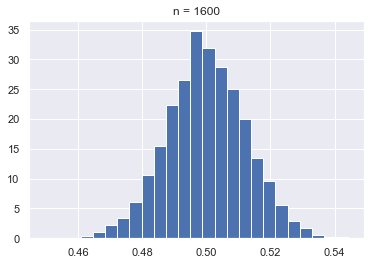

In [27]:
MonteCarlo['value'].hist(density=True, bins=25)
plt.title('n = 1600')
plt.show()

### Effect of sample size on sampling distribution of $\hat{p}$

Comparing the histograms of the sample proportion for n=10, 100, 400 and 1600 above, we see that:

1. the sampling distribution is centered around the "population" proportion 0.50.

2. the sample distribution becomes more and more concentrated near 0.50 as we increase n, both in terms of the concentration of the histogram and the decrease in the standard deviation.

3. the sampling distribution becomes more like a "bell curve" as the sample size increases. 


The **standard deviation** is a measure of the **spread** of the distribution. To a close approximation it is the square-root of mean-square deviation of a set of numbers from their mean. 

Our simulations are suggestive concerning the behavior sample means and sample proportions. The following general result shows why these statistics become more and more precise as estimates, as the sample size is increased.

### Mean and Standard Deviation of sample means and proportions: Square root rule 

When a random sample is drawn from a population the sample mean and sample proportion have expected values equal to the population mean and proportion, respectively. 

More is known: the standard deviation of a sample mean ($\bar{X}$) or sample proportion ($\hat{p}$) from a random sample decreases in proportion to the square root of the sample size n:

$SD(\bar{X})$ $\propto$ $1\over\sqrt{n}$

and

$SD(\hat{p})$ $\propto$ $1\over\sqrt{n}$ 

as the sample size $n$ drawn from a given population is increased.

### Monte Carlo investigation of the square root rule

Let's set up another simulation to test the square root rule. We'll use an asymmetrical distribution of 0s and 1s.

In [28]:
np.repeat(1,9)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
df49 = pd.DataFrame({'binary': np.concatenate((np.repeat(1, 4), 
                                               np.repeat(0, 9)))})
df49

,binary
0,1
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [30]:
print('population proportion = ', df49['binary'].sum()/df49.shape[0])

population proportion =  0.3076923076923077


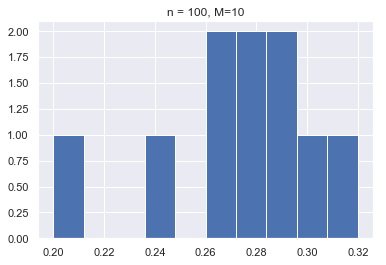

In [31]:
MonteCarlo = MCmeans(df=df49, x='binary', n=100, M=10)
MonteCarlo['binary'].hist()
plt.title("n = 100, M=10")
plt.show()

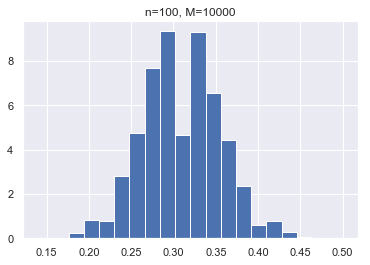

In [32]:
MonteCarlo = MCmeans(df=df49, x='binary', n=100, M=10000)
MonteCarlo['binary'].hist(density=True, bins=20)
plt.title("n=100, M=10000")
plt.show()

In [33]:
# set sample sizes and initialize arrays of means and standard deviations
meanset = []
sdset = []
nset = [1,10,100,400,900,1600,2500,5000]
#nset = [1,10]   # test values while debugging
M=10000
df=df49
x='binary'
for n in nset:
    MC = MCmeans(df=df, x=x, n=n, M=M)
    # print(MC[x].mean())    # uncomment to see values as they're computed
    # print(MC[x].std())     # ditto
    meanset.append(MC[x].mean())
    sdset.append(MC[x].std())
summary = pd.DataFrame({'n': nset, 'mean': meanset, 'std': sdset })
summary

,n,mean,std
0,1,0.312100,0.463374
1,10,0.309640,0.144718
2,100,0.307738,0.045866
3,400,0.307760,0.023196
4,900,0.307690,0.015211
5,1600,0.307676,0.011632
6,2500,0.307847,0.009231
7,5000,0.307674,0.006577


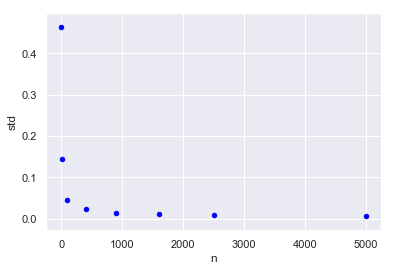

In [34]:
summary.plot.scatter(x='n', y='std', c='blue')
plt.xlabel('n')
plt.ylabel('std')
plt.show()

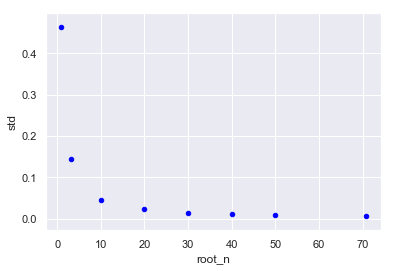

In [35]:
summary['root_n'] = np.sqrt(summary['n'])
summary.plot.scatter(x='root_n', y='std', c='blue')
plt.xlabel('root_n')
plt.ylabel('std')
plt.show()

Finally, to make it easier to see if the square root rate is the correct stabilization of the standard deviation, we graph $\sqrt{n}*STD$ versus $n$.

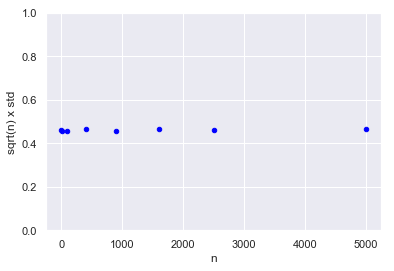

In [36]:
summary['root_n_std'] = summary['root_n']*summary['std']
summary.plot.scatter(x='n', y='root_n_std', c='blue')
plt.xlabel('n')
plt.ylabel('sqrt(n) x std')
plt.ylim([0,1])
plt.show()

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign